In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
results = pd.read_csv(
    'http://www.eecs.qmul.ac.uk/~dm303/t/out/results_andailment.csv',
    low_memory=False,
    na_values=[],
    keep_default_na=False,
    index_col=(
        'entailment_condition',
        'operator',
        'dimensionality',
        'freq',
        'discr',
        'cds',
        'neg',
        'aggregator',
        'distance',
        'base',
        'context_type',
        'ignore_subject',
        'reduction',
        'corpus',
        'fold_num',
    ),
).sort_index()[['andailment', 'fold_label']]

In [3]:
results.loc[results['fold_label'] == '', 'fold_label'] = 'max'
results.set_index('fold_label', append=True, inplace=True)

In [4]:
results = results.unstack('fold_label')['andailment']

In [5]:
results.loc['Diversity(v1) < Diversity(v2)'].head(6)

fold_label                                                                                                                                    max  \
operator dimensionality freq discr cds  neg aggregator distance    base context_type ignore_subject reduction corpus           fold_num             
head     1000           1    cpmi  0.75     mean       correlation      nvaa                        raw       ukwac_wackypedia           0.519531   
                                                                                                                               0.0            NaN   
                                                                                                                               1.0            NaN   
                                                                                                                               2.0            NaN   
                                                                                                                               3.0            NaN   
                                                                                                                               4.0            NaN   

fold_label                                                                                                                                testing  \
operator dimensionality freq discr cds  neg aggregator distance    base context_type ignore_subject reduction corpus           fold_num             
head     1000           1    cpmi  0.75     mean       correlation      nvaa                        raw       ukwac_wackypedia                NaN   
                                                                                                                               0.0       0.131707   
                                                                                                                               1.0       0.141463   
                                                                                                                               2.0       0.126829   
                                                                                                                               3.0       0.141463   
                                                                                                                               4.0       0.107843   

fold_label                                                                                                                               training  
operator dimensionality freq discr cds  neg aggregator distance    base context_type ignore_subject reduction corpus           fold_num            
head     1000           1    cpmi  0.75     mean       correlation      nvaa                        raw       ukwac_wackypedia                NaN  
                                                                                                                               0.0       0.414062  
                                                                                                                               1.0       0.406250  
                                                                                                                               2.0       0.417969  
                                                                                                                               3.0       0.406250  
                                                                                                                               4.0       0.433594

In [6]:
results = results.groupby(level=[v for v in results.index.names if v != 'fold_num']).mean()

In [7]:
(
    results.loc['Diversity(v1) < Diversity(v2)']
    #.sort_values('training', ascending=False)
    .head(1)
    #.plot(kind='bar')
)

,,,,,,,,,,,,fold_label,max,testing,training
operator,dimensionality,freq,discr,cds,neg,aggregator,distance,base,context_type,ignore_subject,reduction,corpus,,,
head,1000,1,cpmi,0.75,,mean,correlation,,nvaa,,raw,ukwac_wackypedia,0.519531,0.129861,0.415625


In [8]:
def best_model(df):
    best_setting = df['max'].argmax()
    best_score = df['max'].loc[best_setting]

    result = pd.concat([pd.Series({'score': best_score}), pd.Series(best_setting, index=df.index.names)])
    
    return result
    
results_max = results.groupby(level='entailment_condition', as_index=False).apply(best_model).set_index('entailment_condition')
results_max

,score,operator,dimensionality,freq,discr,cds,neg,aggregator,distance,base,context_type,ignore_subject,reduction,corpus
entailment_condition,,,,,,,,,,,,,,
Diversity(v1) < Diversity(v2),0.675781,head,1000,logn,spmi,global,0.2,sum,correlation,e,nvaa,,raw,ukwac_wackypedia
E(svo1) < E(svo2),0.683594,frobenious-add,1000,1,scpmi,global,0.2,,,e,nvaa,False,raw,ukwac_wackypedia
E(v1) < E(v2),0.582031,head,2000,1,n,global,,,,,nvaa,False,raw,ukwac_wackypedia
E(vo1) < E(vo2),0.675781,frobenious-add,1000,1,cpmi,1,,,,,nvaa,True,raw,ukwac_wackypedia
"KL(svo1, svo2) < KL(svo2, svo1)",0.625000,relational,1000,n,spmi,global,2,,,e,nvaa,False,raw,ukwac_wackypedia
"KL(v1, v2) < KL(v2, v1)",0.558594,head,1000,1,spmi,0.75,1.4,,,e,nvaa,False,raw,ukwac_wackypedia
"KL(vo1, vo2) < KL(vo2, vo1)",0.605469,copy-subject,1000,1,spmi,1,1.4,,,e,nvaa,True,raw,ukwac_wackypedia


In [9]:
def cross_validation(df):
    best_training_setting = df['training'].argmax()
    test_score = df['testing'].loc[best_training_setting]

    result = pd.concat([pd.Series({'score': test_score, 'training': df['training'].max()}), pd.Series(best_training_setting, index=df.index.names)])
    
    return result
    
results_cross_validation = results.groupby(level='entailment_condition', as_index=False).apply(cross_validation).set_index('entailment_condition')
results_cross_validation

,score,training,operator,dimensionality,freq,discr,cds,neg,aggregator,distance,base,context_type,ignore_subject,reduction,corpus
entailment_condition,,,,,,,,,,,,,,,
Diversity(v1) < Diversity(v2),0.168943,0.540625,head,1000,logn,spmi,global,0.2,sum,correlation,e,nvaa,,raw,ukwac_wackypedia
E(svo1) < E(svo2),0.683937,0.683615,frobenious-add,1000,1,scpmi,global,0.2,,,e,nvaa,False,raw,ukwac_wackypedia
E(v1) < E(v2),0.581900,0.582023,head,2000,1,n,global,,,,,nvaa,False,raw,ukwac_wackypedia
E(vo1) < E(vo2),0.676169,0.675806,frobenious-outer,1000,1,spmi,global,0.2,,,e,nvaa,True,raw,ukwac_wackypedia
"KL(svo1, svo2) < KL(svo2, svo1)",0.624887,0.624993,relational,1000,n,spmi,global,2,,,e,nvaa,False,raw,ukwac_wackypedia
"KL(v1, v2) < KL(v2, v1)",0.558296,0.558575,head,5000,logn,cpmi,1,,,,,nvaa,False,raw,ukwac_wackypedia
"KL(vo1, vo2) < KL(vo2, vo1)",0.605128,0.605447,copy-subject,1000,1,spmi,1,1.4,,,e,nvaa,True,raw,ukwac_wackypedia


,Max,Cross-validation
Freq(v1) < Freq(v2),0.559,NaN
"KL(P(o|v1), P(o)) < KL(P(o|v2), P(o)))",0.574,NaN
E(v1) < E(v2),0.582,0.582
E(vo1) < E(vo2),0.676,0.676
E(svo1) < E(svo2),0.684,0.684
"KL(v1, v2) < KL(v2, v1)",0.559,0.558
"KL(vo1, vo2) < KL(vo2, vo1)",0.605,0.605
"KL(svo1, svo2) < KL(svo2, svo1)",0.625,0.625
Diversity(v1) < Diversity(v2),0.676,0.169


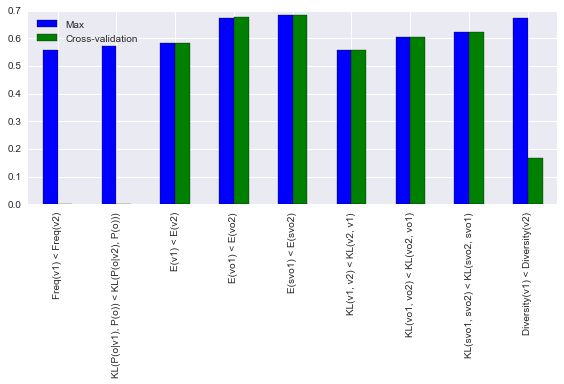

In [10]:
table = pd.DataFrame(
    {
        'Max': pd.concat(
            [
                pd.Series([0.559, 0.574], index=['Freq(v1) < Freq(v2)', 'KL(P(o|v1), P(o)) < KL(P(o|v2), P(o)))']),
                results_max['score'],
            ]
        ),
        'Cross-validation': results_cross_validation['score'],
    },
).loc[
    [
        'Freq(v1) < Freq(v2)',
        'KL(P(o|v1), P(o)) < KL(P(o|v2), P(o)))',
        'E(v1) < E(v2)',
        'E(vo1) < E(vo2)',
        'E(svo1) < E(svo2)',
        'KL(v1, v2) < KL(v2, v1)',
        'KL(vo1, vo2) < KL(vo2, vo1)',
        'KL(svo1, svo2) < KL(svo2, svo1)',
        'Diversity(v1) < Diversity(v2)',
    ],
    ['Max', 'Cross-validation']
]

fig = table.plot(kind='bar').get_figure()

fig.tight_layout()
fig.savefig('results_andailment.pdf')

table.round(3)